In [1]:
#Some Basic Information About columns in Dataset
#(1)Day: day of the date
#(2)Month: month of the date
#(3)ForecastWindProduction: the forecasted wind production for this period 
# refers to the prediction or estimation amount of electricity that will generated by wind
#(4)SystemLoadEA: A "national load forecast" refers to the prediction or estimation of the total electricity consumption or demand for a particular country over a specific period of time.
#(5)SMPEA: the price forecast for this period refers to the prediction or estimation of the prices of electricity over a specific time frame in the future.
#(6)ORKTemperature: the actual temperature measured at particular place
#(7)ORKWindspeed: the actual windspeed measured at particular place
#(8)CO2Intensity:.CO2 intensity, also known as carbon intensity refers to the amount of carbon dioxide (CO2) emissions produced per unit of a specific electric energy generated.
#(9)ActualWindProduction: actual wind energy production for this period" represents the verified and quantified amount of electrical energy generated
#   by wind turbines over a specific timeframe. 
#(10)SystemLoadEP2:the actual real-time or observed total electricity demand on a
#     country's national electrical grid during a specific timeframe. 
#(11)SMPEA2:refers to the real, observed, or current price at which electricity is being
#          bought and sold in a particular electricity market during a specific time frame(mvh).

In [2]:
#Load the Data using pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv("electricity_prices.csv")
data.head()

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,01-11-2011 00:00,NaN,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6,9.3,600.71,356,3159.6,54.32
1,01-11-2011 00:30,NaN,0,1,44,1,11,2011,1,321.8,3196.66,49.26,6,11.1,605.42,317,2973.01,54.23
2,01-11-2011 01:00,NaN,0,1,44,1,11,2011,2,328.57,3060.71,49.1,5,11.1,589.97,311,2834,54.23
3,01-11-2011 01:30,NaN,0,1,44,1,11,2011,3,335.6,2945.56,48.04,6,9.3,585.94,313,2725.99,53.47
4,01-11-2011 02:00,NaN,0,1,44,1,11,2011,4,342.9,2849.34,33.75,6,11.1,571.52,346,2655.64,39.87


In [3]:
#Drop the column "Holiday"
data.drop(["Holiday"],axis=1,inplace=True)

In [4]:
#Drop the column "DateTime"
data.drop(["DateTime"],axis=1,inplace=True)

In [5]:
data.drop(["HolidayFlag"],axis=1,inplace=True)

In [6]:
data.drop(["DayOfWeek"],axis=1,inplace=True)

In [7]:
data.drop(["WeekOfYear"],axis=1,inplace=True)

In [8]:
data.drop(["Year"],axis=1,inplace=True)

In [9]:
data.drop(["PeriodOfDay"],axis=1,inplace=True)

In [10]:
#Information About the Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Day                     38014 non-null  int64 
 1   Month                   38014 non-null  int64 
 2   ForecastWindProduction  38014 non-null  object
 3   SystemLoadEA            38014 non-null  object
 4   SMPEA                   38014 non-null  object
 5   ORKTemperature          38014 non-null  object
 6   ORKWindspeed            38014 non-null  object
 7   CO2Intensity            38014 non-null  object
 8   ActualWindProduction    38014 non-null  object
 9   SystemLoadEP2           38014 non-null  object
 10  SMPEP2                  38014 non-null  object
dtypes: int64(2), object(9)
memory usage: 3.2+ MB


In [11]:
#Convert the particular object type columns into float using to_numeric
#errors="coerce" means some value can not convert into the float so that particular value convert into Nan value
data["ForecastWindProduction"] = pd.to_numeric(data["ForecastWindProduction"], errors= 'coerce')
data["SystemLoadEA"] = pd.to_numeric(data["SystemLoadEA"], errors= 'coerce')
data["SMPEA"] = pd.to_numeric(data["SMPEA"], errors= 'coerce')
data["ORKTemperature"] = pd.to_numeric(data["ORKTemperature"], errors= 'coerce')
data["ORKWindspeed"] = pd.to_numeric(data["ORKWindspeed"], errors= 'coerce')
data["CO2Intensity"] = pd.to_numeric(data["CO2Intensity"], errors= 'coerce')
data["ActualWindProduction"] = pd.to_numeric(data["ActualWindProduction"], errors= 'coerce')
data["SystemLoadEP2"] = pd.to_numeric(data["SystemLoadEP2"], errors= 'coerce')
data["SMPEP2"] = pd.to_numeric(data["SMPEP2"], errors= 'coerce')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Day                     38014 non-null  int64  
 1   Month                   38014 non-null  int64  
 2   ForecastWindProduction  38009 non-null  float64
 3   SystemLoadEA            38012 non-null  float64
 4   SMPEA                   38012 non-null  float64
 5   ORKTemperature          37719 non-null  float64
 6   ORKWindspeed            37715 non-null  float64
 7   CO2Intensity            38007 non-null  float64
 8   ActualWindProduction    38009 non-null  float64
 9   SystemLoadEP2           38012 non-null  float64
 10  SMPEP2                  38012 non-null  float64
dtypes: float64(9), int64(2)
memory usage: 3.2 MB


In [13]:
#Before remove null values
data.isnull().sum()

Day                         0
Month                       0
ForecastWindProduction      5
SystemLoadEA                2
SMPEA                       2
ORKTemperature            295
ORKWindspeed              299
CO2Intensity                7
ActualWindProduction        5
SystemLoadEP2               2
SMPEP2                      2
dtype: int64

In [14]:
data = data.dropna()
#data.dropna(inplace=True)

In [15]:
#After remove null values
data.isnull().sum()

Day                       0
Month                     0
ForecastWindProduction    0
SystemLoadEA              0
SMPEA                     0
ORKTemperature            0
ORKWindspeed              0
CO2Intensity              0
ActualWindProduction      0
SystemLoadEP2             0
SMPEP2                    0
dtype: int64

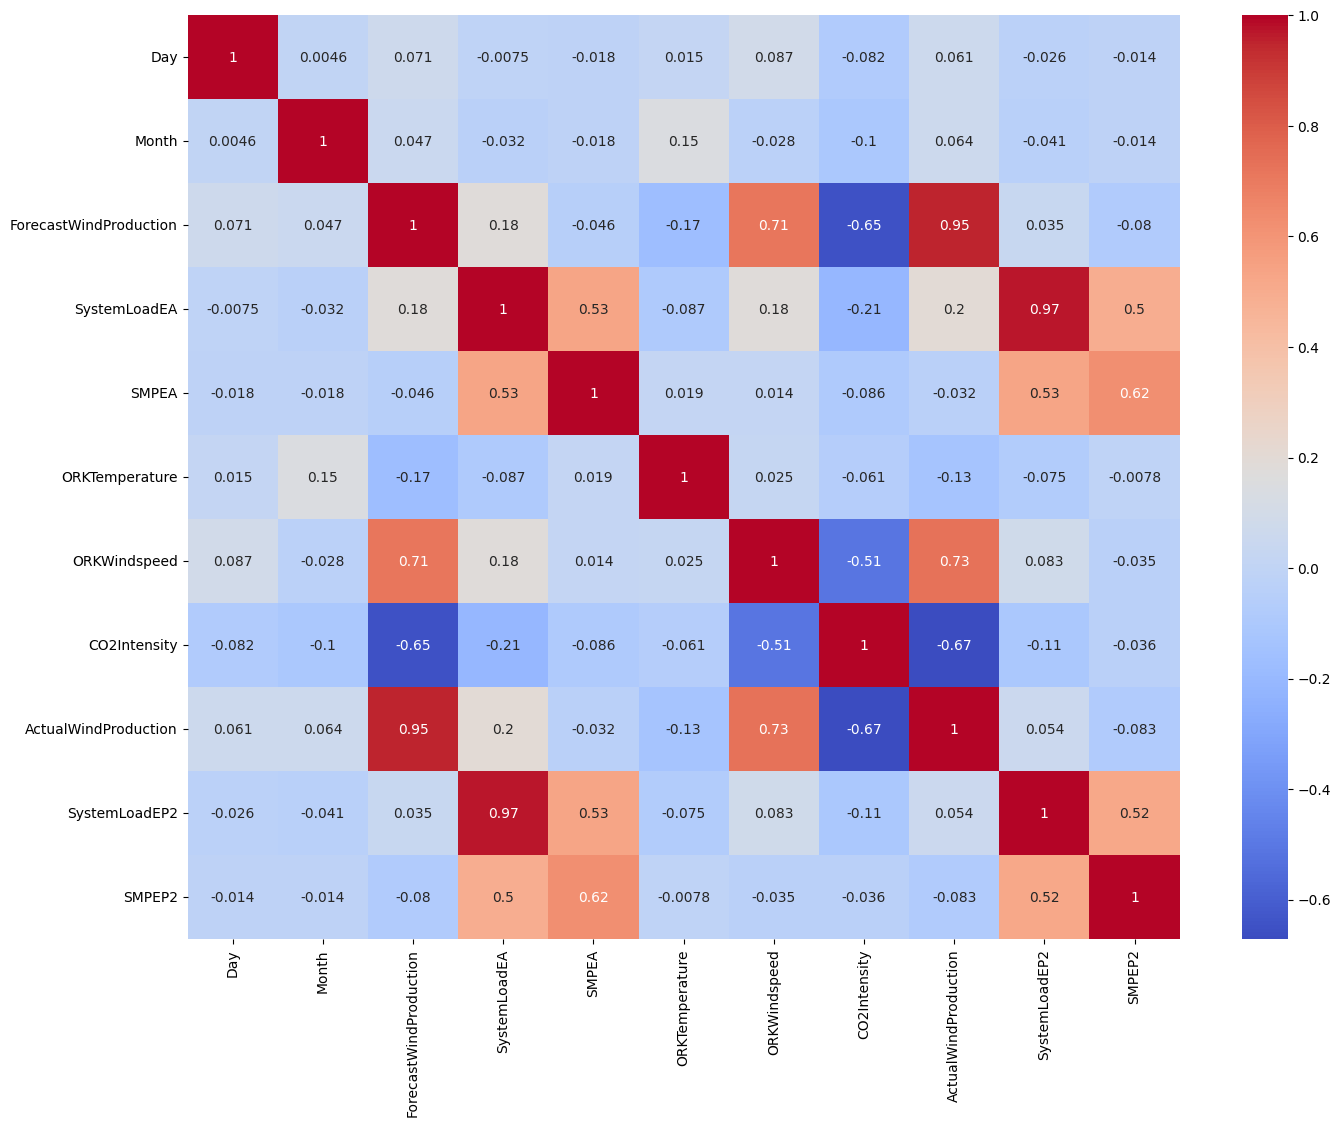

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
correlations = data.corr(method='pearson')
#method of corelatrion (pearson)
plt.figure(figsize=(16, 12))
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

<Axes: >

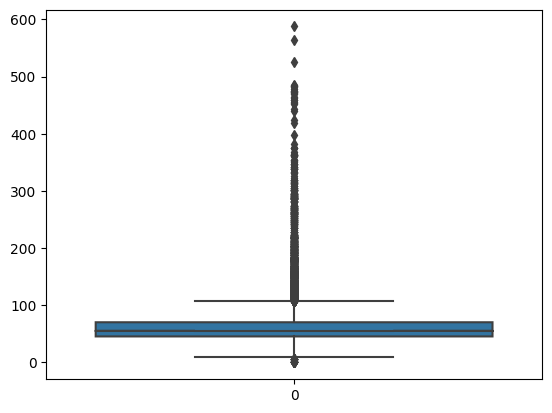

In [17]:
#for finding the outliers for column "SMPEA"
import seaborn as sns
sns.boxplot(data["SMPEA"],notch=True)

In [18]:
column_name = 'SMPEA'

# Calculate the IQR (Interquartile Range)
Q1 = data[column_name].quantile(0.25)
Q3 = data[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
data= data[(data[column_name] >= lower_bound) & (data[column_name] <= upper_bound)]
data

,Day,Month,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,1,11,315.31,3388.77,49.26,6.0,9.3,600.71,356.0,3159.60,54.32
1,1,11,321.80,3196.66,49.26,6.0,11.1,605.42,317.0,2973.01,54.23
2,1,11,328.57,3060.71,49.10,5.0,11.1,589.97,311.0,2834.00,54.23
3,1,11,335.60,2945.56,48.04,6.0,9.3,585.94,313.0,2725.99,53.47
4,1,11,342.90,2849.34,33.75,6.0,11.1,571.52,346.0,2655.64,39.87
...,...,...,...,...,...,...,...,...,...,...,...
38009,31,12,1179.14,3932.22,34.51,6.0,22.2,285.31,812.0,3692.95,42.45
38010,31,12,1152.01,3821.44,33.83,5.0,24.1,278.31,852.0,3571.00,33.83
38011,31,12,1123.67,3724.21,31.75,4.0,20.4,280.91,962.0,3460.29,31.75
38012,31,12,1094.24,3638.16,33.83,5.0,14.8,302.46,950.0,3563.99,50.60


<Axes: >

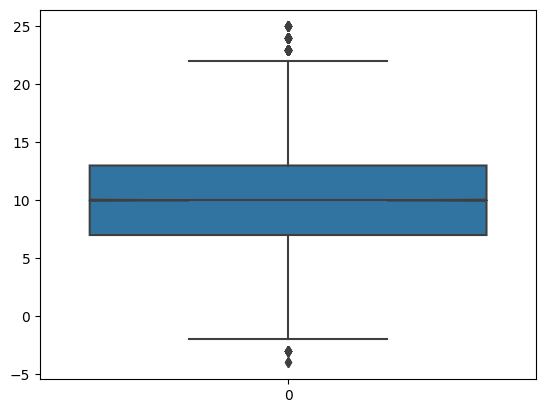

In [19]:
#for finding the outliers for column "ORKTemperature"
import seaborn as sns
sns.boxplot(data["ORKTemperature"],notch=True)

In [20]:
column_name = 'ORKTemperature'

# Calculate the IQR (Interquartile Range)
Q1 = data[column_name].quantile(0.25)
Q3 = data[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
data= data[(data[column_name] >= lower_bound) & (data[column_name] <= upper_bound)]
data

,Day,Month,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,1,11,315.31,3388.77,49.26,6.0,9.3,600.71,356.0,3159.60,54.32
1,1,11,321.80,3196.66,49.26,6.0,11.1,605.42,317.0,2973.01,54.23
2,1,11,328.57,3060.71,49.10,5.0,11.1,589.97,311.0,2834.00,54.23
3,1,11,335.60,2945.56,48.04,6.0,9.3,585.94,313.0,2725.99,53.47
4,1,11,342.90,2849.34,33.75,6.0,11.1,571.52,346.0,2655.64,39.87
...,...,...,...,...,...,...,...,...,...,...,...
38009,31,12,1179.14,3932.22,34.51,6.0,22.2,285.31,812.0,3692.95,42.45
38010,31,12,1152.01,3821.44,33.83,5.0,24.1,278.31,852.0,3571.00,33.83
38011,31,12,1123.67,3724.21,31.75,4.0,20.4,280.91,962.0,3460.29,31.75
38012,31,12,1094.24,3638.16,33.83,5.0,14.8,302.46,950.0,3563.99,50.60


<Axes: >

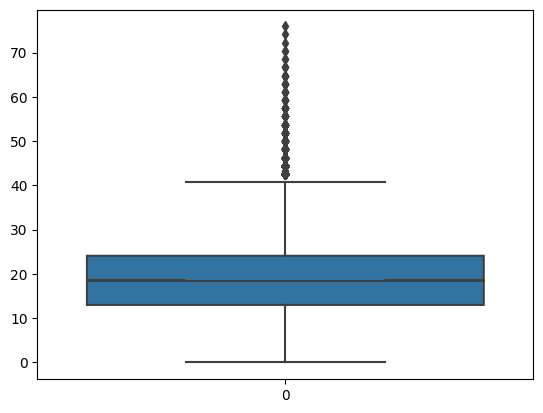

In [21]:
#for finding the outliers for column "ORKWindSpeed"
import seaborn as sns
sns.boxplot(data["ORKWindspeed"],notch=True)

In [22]:
column_name = 'ORKWindspeed'
# Calculate the IQR (Interquartile Range)
Q1 = data[column_name].quantile(0.25)
Q3 = data[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
data= data[(data[column_name] >= lower_bound) & (data[column_name] <= upper_bound)]
data

,Day,Month,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,1,11,315.31,3388.77,49.26,6.0,9.3,600.71,356.0,3159.60,54.32
1,1,11,321.80,3196.66,49.26,6.0,11.1,605.42,317.0,2973.01,54.23
2,1,11,328.57,3060.71,49.10,5.0,11.1,589.97,311.0,2834.00,54.23
3,1,11,335.60,2945.56,48.04,6.0,9.3,585.94,313.0,2725.99,53.47
4,1,11,342.90,2849.34,33.75,6.0,11.1,571.52,346.0,2655.64,39.87
...,...,...,...,...,...,...,...,...,...,...,...
38009,31,12,1179.14,3932.22,34.51,6.0,22.2,285.31,812.0,3692.95,42.45
38010,31,12,1152.01,3821.44,33.83,5.0,24.1,278.31,852.0,3571.00,33.83
38011,31,12,1123.67,3724.21,31.75,4.0,20.4,280.91,962.0,3460.29,31.75
38012,31,12,1094.24,3638.16,33.83,5.0,14.8,302.46,950.0,3563.99,50.60


<Axes: >

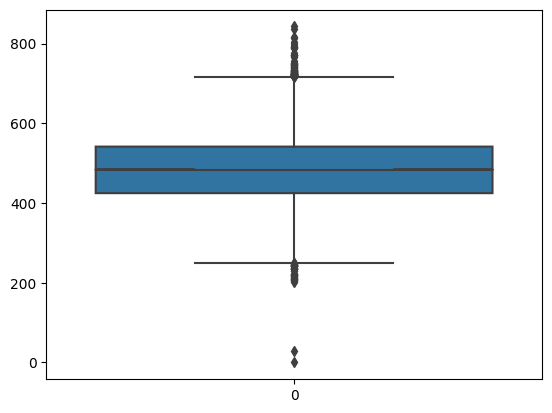

In [23]:
#for finding the outliers for column "SMPEA"
import seaborn as sns
sns.boxplot(data["CO2Intensity"],notch=True)

In [24]:
column_name = 'CO2Intensity'
# Calculate the IQR (Interquartile Range)
Q1 = data[column_name].quantile(0.25)
Q3 = data[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
data= data[(data[column_name] >= lower_bound) & (data[column_name] <= upper_bound)]
data

,Day,Month,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,1,11,315.31,3388.77,49.26,6.0,9.3,600.71,356.0,3159.60,54.32
1,1,11,321.80,3196.66,49.26,6.0,11.1,605.42,317.0,2973.01,54.23
2,1,11,328.57,3060.71,49.10,5.0,11.1,589.97,311.0,2834.00,54.23
3,1,11,335.60,2945.56,48.04,6.0,9.3,585.94,313.0,2725.99,53.47
4,1,11,342.90,2849.34,33.75,6.0,11.1,571.52,346.0,2655.64,39.87
...,...,...,...,...,...,...,...,...,...,...,...
38009,31,12,1179.14,3932.22,34.51,6.0,22.2,285.31,812.0,3692.95,42.45
38010,31,12,1152.01,3821.44,33.83,5.0,24.1,278.31,852.0,3571.00,33.83
38011,31,12,1123.67,3724.21,31.75,4.0,20.4,280.91,962.0,3460.29,31.75
38012,31,12,1094.24,3638.16,33.83,5.0,14.8,302.46,950.0,3563.99,50.60


<Axes: >

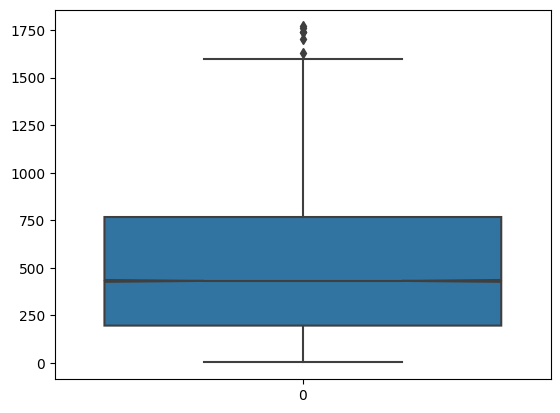

In [25]:
#for finding the outliers for column "ActualWindProduction"
import seaborn as sns
sns.boxplot(data["ActualWindProduction"],notch=True)

In [26]:
column_name = 'ActualWindProduction'
# Calculate the IQR (Interquartile Range)
Q1 = data[column_name].quantile(0.25)
Q3 = data[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
data= data[(data[column_name] >= lower_bound) & (data[column_name] <= upper_bound)]
data

,Day,Month,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,1,11,315.31,3388.77,49.26,6.0,9.3,600.71,356.0,3159.60,54.32
1,1,11,321.80,3196.66,49.26,6.0,11.1,605.42,317.0,2973.01,54.23
2,1,11,328.57,3060.71,49.10,5.0,11.1,589.97,311.0,2834.00,54.23
3,1,11,335.60,2945.56,48.04,6.0,9.3,585.94,313.0,2725.99,53.47
4,1,11,342.90,2849.34,33.75,6.0,11.1,571.52,346.0,2655.64,39.87
...,...,...,...,...,...,...,...,...,...,...,...
38009,31,12,1179.14,3932.22,34.51,6.0,22.2,285.31,812.0,3692.95,42.45
38010,31,12,1152.01,3821.44,33.83,5.0,24.1,278.31,852.0,3571.00,33.83
38011,31,12,1123.67,3724.21,31.75,4.0,20.4,280.91,962.0,3460.29,31.75
38012,31,12,1094.24,3638.16,33.83,5.0,14.8,302.46,950.0,3563.99,50.60


<Axes: >

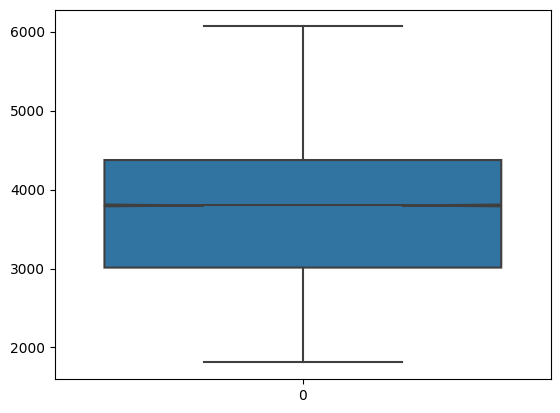

In [27]:
#No outliers
import seaborn as sns
sns.boxplot(data["SystemLoadEP2"],notch=True)

<Axes: >

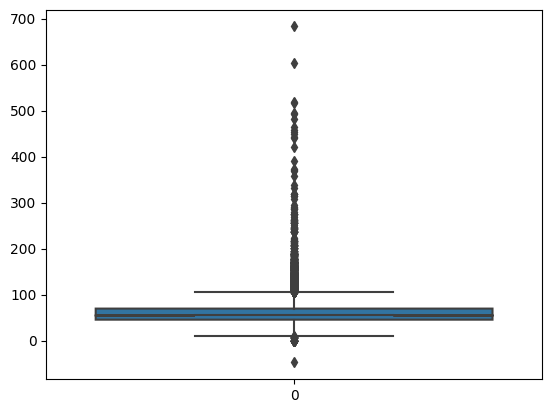

In [28]:
#for finding the outliers for column "SMPEA2"
import seaborn as sns
sns.boxplot(data["SMPEP2"],notch=True)

In [29]:
column_name = 'SMPEP2'
# Calculate the IQR (Interquartile Range)
Q1 = data[column_name].quantile(0.25)
Q3 = data[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
data= data[(data[column_name] >= lower_bound) & (data[column_name] <= upper_bound)]
data

,Day,Month,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,1,11,315.31,3388.77,49.26,6.0,9.3,600.71,356.0,3159.60,54.32
1,1,11,321.80,3196.66,49.26,6.0,11.1,605.42,317.0,2973.01,54.23
2,1,11,328.57,3060.71,49.10,5.0,11.1,589.97,311.0,2834.00,54.23
3,1,11,335.60,2945.56,48.04,6.0,9.3,585.94,313.0,2725.99,53.47
4,1,11,342.90,2849.34,33.75,6.0,11.1,571.52,346.0,2655.64,39.87
...,...,...,...,...,...,...,...,...,...,...,...
38009,31,12,1179.14,3932.22,34.51,6.0,22.2,285.31,812.0,3692.95,42.45
38010,31,12,1152.01,3821.44,33.83,5.0,24.1,278.31,852.0,3571.00,33.83
38011,31,12,1123.67,3724.21,31.75,4.0,20.4,280.91,962.0,3460.29,31.75
38012,31,12,1094.24,3638.16,33.83,5.0,14.8,302.46,950.0,3563.99,50.60


In [30]:
x = data[["Day", "Month", "ForecastWindProduction", "SystemLoadEA", 
          "SMPEA", "ORKTemperature", "ORKWindspeed", "CO2Intensity", 
          "ActualWindProduction", "SystemLoadEP2"]]
# x=data.drop("SMPEP2",axis=1)
y = data["SMPEP2"]
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.3, 
                                                random_state=42)

In [31]:
# from sklearn.linear_model import LinearRegression
# # Create a LinearRegression model
# model = LinearRegression()
# # Fit the LinearRegression model to the training data
# model.fit(xtrain, ytrain)
#r2_score=0.576
#Accuracy=0.85

In [32]:
# from sklearn.tree import DecisionTreeRegressor
# # Create a DecisionTreeRegressor model
# model = DecisionTreeRegressor(random_state=42)
# # Fit the DecisionTreeRegressor model to the training data
# model.fit(xtrain, ytrain)
#r2_score=0.522
#Accuracy=0.885

In [33]:
from sklearn.ensemble import RandomForestRegressor
#Randomforest use for complex data and objective data
model = RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(xtrain, ytrain)

RandomForestRegressor(random_state=42)

In [34]:
y_pred=model.predict(xtest)
print(xtest.shape)
print(ytest.shape)
print(y_pred.shape)

(9851, 10)
(9851,)
(9851,)


In [35]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
mean_y=ytest.mean()
#r2_score based on coefficients detemination
print("R2_Score:",r2_score(ytest,y_pred))
forest_mae=mean_absolute_error(ytest,y_pred)
forest_mse=mean_squared_error(ytest,y_pred)
print("Mean_Absolute_error:",forest_mae)
print("Mean_squared_error:",forest_mse)
print('prediction accuracy: ' +str(1-forest_mae/mean_y))
print("Score:",model.score(xtrain,ytrain))

R2_Score: 0.7672651089622974
Mean_Absolute_error: 5.352317703786417
Mean_squared_error: 65.3283147017105
prediction accuracy: 0.9052821844820146
Score: 0.9675524540297424


In [36]:
df=pd.DataFrame({"actual":ytest,"predicted":y_pred})
df.tail()

,actual,predicted
21359,48.90,58.9179
22801,39.87,39.7406
2692,44.52,44.2269
25130,78.66,79.3068
22870,83.53,74.3818


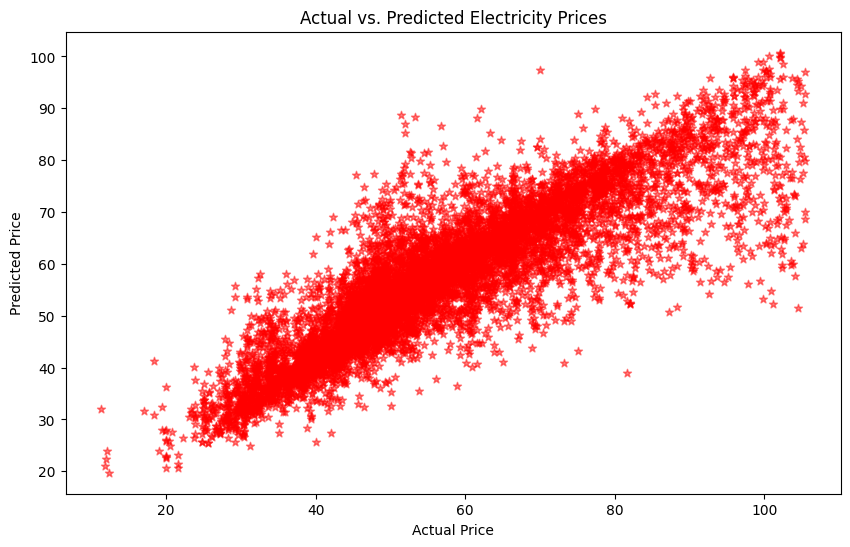

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(ytest, y_pred, alpha=0.5,c="red",marker="*")
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Electricity Prices')
plt.show()

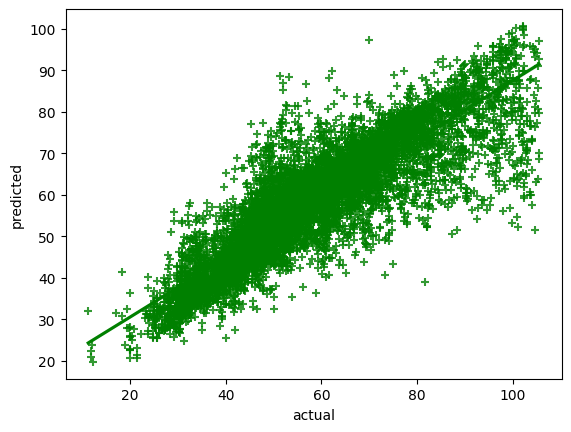

In [38]:
import seaborn as sns
sns.regplot(x="actual",y="predicted",data=df,color='green',marker="+")
plt.show()

In [39]:
import numpy as np
#features = [["Day", "Month", "ForecastWindProduction", "SystemLoadEA", "SMPEA", "ORKTemperature", "ORKWindspeed", "CO2Intensity", "ActualWindProduction", "SystemLoadEP2"]]
features = np.array([[13, 10, 345.00, 2100.00, 25.00, 12.0, 34.00, 400.00, 54.0, 4400.00]])
model.predict(features)


array([44.1254])

<Axes: >

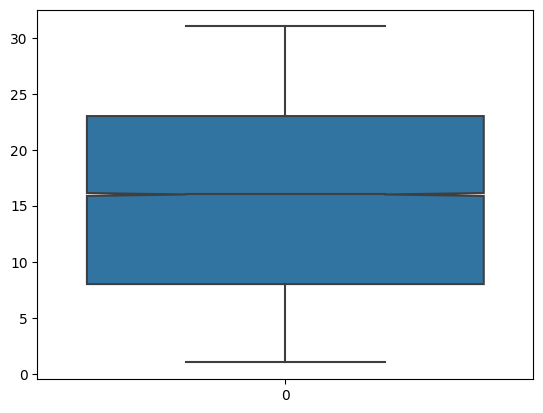

In [40]:
import seaborn as sns
sns.boxplot(data["Day"],notch=True)

In [41]:
data['ORKTemperature'].describe()

count    32836.000000
mean         9.711079
std          4.394322
min         -2.000000
25%          7.000000
50%         10.000000
75%         13.000000
max         22.000000
Name: ORKTemperature, dtype: float64

In [42]:
data['SMPEA'].describe()

count    32836.000000
mean        56.248464
std         16.293248
min         10.000000
25%         44.710000
50%         53.060000
75%         65.880000
max        107.480000
Name: SMPEA, dtype: float64

In [43]:
data['SystemLoadEA'].describe()

count    32836.000000
mean      3905.937745
std        810.498755
min       2183.940000
25%       3199.835000
50%       3962.755000
75%       4540.745000
max       6333.520000
Name: SystemLoadEA, dtype: float64

In [44]:
data['ForecastWindProduction'].describe()

count    32836.000000
mean       525.634081
std        399.671468
min          0.900000
25%        185.800000
50%        425.345000
75%        805.600000
max       1601.800000
Name: ForecastWindProduction, dtype: float64

In [45]:
data['SystemLoadEP2'].describe()

count    32836.000000
mean      3678.199503
std        794.042950
min       1809.960000
25%       2980.635000
50%       3745.635000
75%       4333.052500
max       6014.110000
Name: SystemLoadEP2, dtype: float64

In [46]:
import pickle
pickle.dump(data,open('data.pkl','wb'))
pickle.dump(model,open('model.pkl','wb'))